> # Library

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import folium 
from wordcloud import WordCloud
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

import warnings
warnings.filterwarnings("ignore")

> # Latar Belakang

**Boston** adalah ibu kota dan kota terbesar di Massachusetts di Amerika Serikat. Kota ini salah satu kota tertua dan terkaya di Amerika, dengan ekonomi berbasis di pendidikan, perawatan kesehatan, keuangan, dan teknologi tinggi (Sumber : [Wikiwand](https://www.wikiwand.com/id/Boston)). Boston merupakan lokasi dari beberapa perguruan tinggi terkemuka, seperti Universitas Harvard dan MIT (Sumber : [idntimes](https://www.idntimes.com/travel/destination/dwi-ayu-silawati/wisata-unik-di-boston-exp-c1c2)).

Pada notebook ini, akan dipaparkan analisis dataset tentang kejadian atau insiden yang terjadi di Boston. Dataset bersumber dari Departement Kepolisian Boston yang berisikan rincian awal seputar insiden atau kejahatan yang ditangani oleh Departemen Kepolisian Boston ini (Sumber : [Kaggle](https://www.kaggle.com/datasets/AnalyzeBoston/crimes-in-boston)).

> ## Pernyataan Masalah

Jika kita memposisikan diri sebagai warga yang tinggal disekitaran Boston, tentu kita ingin **mengetahui insiden atau kejadian seperti apa yang terjadi di kota tersebut**. Dan juga **karakteristik seperti apa yang dimiliki oleh setiap insiden atau kejadian**. Informasi ini akan berguna untuk bisa mengidentifikasi kejadian tersebut secara tepat. 

**Kapan insiden-insiden tersebut sering terjadi**, dan **dimana insiden-insiden tersebut sering terjadi** juga merupakan informasi yang berguna untuk dianalisa. Untuk menjawab pertanyaan-pertanyaan mendasar tersebut, Disini kita akan melakukan analisis terhadap dataset untuk mendapatkan suatu kesimpulan atau wawasan yang berguna terhadap insiden-insiden yang sering terjadi di kota Boston.

> # Dataset

In [2]:
# Memanggil dan menyimpan dataset dalam variabel

df_crime = pd.read_csv("/content/drive/MyDrive/Purwadhika/crime.csv", encoding = 'latin')
df_offense = pd.read_csv("/content/drive/MyDrive/Purwadhika/offense_codes.csv", encoding = 'latin')

> ## Content :

* **INCIDENT_NUMBER :** unique value untuk setiap kasus. 
* **OFFENSE_CODE :** Kode untuk tipe kejahatan. Dataset Offens_code menjelaskan arti dari setiap kode.
* **OFFENSE_CODE_GROUP :** Nama untuk setiap tipe kejahatan.
* **OFFENSE_DESCRIPTION :** Penjelasan lebih spesifik untuk setiap kejahatan.
* **DISTRICT :** Kode wilayah dimana kejahatan itu terjadi.
* **REPORTING_AREA :** Nomor area TKP(Tempat Kejadian Perkara).
* **SHOOTING :** Jika pada kejahatan tersebut terjadi penembakan, maka itu artinya "Y".
* **OCCURED_ON_DATE :** Waktu kejahatan terjadi (Tahun, bulan, hari dan jam).
* **YEAR :** Tahun kejahatan terjadi.
* **MONTH :** Bulan kejahatan terjadi.
* **DAY OF WEEK :** Hari kejadian.
* **HOUR :** Jam kejahatan itu terjadi.
* **UCR_PART :** 
* **STREET :** Nama jalan tempat kejahatan terjadi.
* **LAT :** Latitude dari tempat kejahatan terjadi.
* **LONG :** Longitude dari tempat kejahatan terjadi.
* **LOCATION :** latitude dan longitude dari tempat kejahatan terjadi.



In [3]:
# Melihat 5 data teratas dan terbawah dataset crime

display(df_crime.head(), df_crime.tail())

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"
319072,142052550,3125,Warrant Arrests,WARRANT ARREST,D4,903,NaN,2015-06-22 00:12:00,2015,6,Monday,0,Part Three,WASHINGTON ST,42.333839,-71.080290,"(42.33383935, -71.08029038)"


In [4]:
# Melihat 5 data teratas dan terbawah dataset Offense_codes

display(df_offense.head(), df_offense.tail())

,CODE,NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION


,CODE,NAME
571,1806,DRUGS - CLASS B TRAFFICKING OVER 18 GRAMS
572,1807,DRUGS - CLASS D TRAFFICKING OVER 50 GRAMS
573,1610,HUMAN TRAFFICKING - COMMERCIAL SEX ACTS
574,2010,HOME INVASION
575,1620,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE


> # Data Understanding and Cleaning

In [5]:
# informasi dasar mengenai data

df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [6]:
# Dimensi dataset sebelum di cleaning

sebelum = df_crime.shape
sebelum

(319073, 17)

In [7]:
# statistik deskriptif
display(df_crime.describe(include = "O"))
display(df_crime.describe())

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319073,319073,319073,317308,319073,1019,319073,319073,318983,308202,319073
unique,282517,67,244,12,879,1,233229,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,2017-06-01 00:00:00,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49945,20250,1019,29,48495,158553,14194,19999


,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


Dari beberapa informasi diatas, kita bisa tahu bahwa beberapa kolom memiliki missing value. Pada kolom `INCIDENT_NUMBER` jumlah data dan jumlah unique valuenya berbeda, padahal setiap kasus harusnya hanya memiliki satu unique value, sehingga ada indikasi data yang terduplikasi. Kita juga perlu mengetahui dataset OFFENSE_CODE perlu juga untuk dianalisis. Dalam setiap data yang memiliki data tahunan, hal yang penting untuk diperiksa juga adalah kelengkapan bulan untuk setiap tahun, supaya analisa kita tidak bias karena ada data yang tidak lengkap.

> ## Apa fungsi dataset `Offense_Code`?

Dataset OFFENSE_CODE adalah penjelasan dari kode kejahatan pada dataset CRIME. Namun pada dataset CRIME terdapat kolom `offense_description`. Kita akan mencoba menggabungkan kedua tabel ini dan melihat apakah kolom `offense_description` sama dengan kolom `Name` pada dataset OFFENSE_CODE.

In [8]:
# Mengubah nama kolom CODE menjadi OFFENSE_CODE
print(df_offense.columns)
df_offense.rename(columns = {"CODE" :  "OFFENSE_CODE"}, inplace = True)
df_offense.columns

Index(['CODE', 'NAME'], dtype='object')


Index(['OFFENSE_CODE', 'NAME'], dtype='object')

In [9]:
pd.merge(df_crime, df_offense, on = "OFFENSE_CODE")[["OFFENSE_CODE", "OFFENSE_DESCRIPTION", "NAME"]].sample(15)

,OFFENSE_CODE,OFFENSE_DESCRIPTION,NAME
120876,3301,VERBAL DISPUTE,VERBAL DISPUTE
75328,3114,INVESTIGATE PROPERTY,INVESTIGATE PROPERTY
403741,3115,INVESTIGATE PERSON,INVESTIGATE PERSON
568571,1415,GRAFFITI,VANDALISM - GRAFFITI
398192,3115,INVESTIGATE PERSON,INVESTIGATE PERSON
299049,3207,PROPERTY - FOUND,PROPERTY - FOUND
105541,3301,VERBAL DISPUTE,VERBAL DISPUTE
116742,3301,VERBAL DISPUTE,VERBAL DISPUTE
363445,617,LARCENY THEFT FROM BUILDING,LARCENY THEFT FROM BUILDING
340135,3125,WARRANT ARREST,WARRANT ARREST


Terlihat isi kedua kolom itu sama, yang berarti dataset OFFENSE_CODE tidak akan digunakan.

> ## Handling Duplicate Data

Kolom `INCIDENT_NUMBER` adalah unique value untuk setiap kejahatan, yang berarti kalau ada `INCIDENT_NUMBER` yang sama kemungkinan besar data tersebut adalah duplikat.

In [10]:
# Menghitung jumlah data yang terindikasi merupakan data duplicate

df_crime.duplicated(subset = "INCIDENT_NUMBER", keep = "first").sum()

36556

In [11]:
# Check salah satu INCIDENT_NUMBER yang terindikasai duplikat

df_crime[df_crime["INCIDENT_NUMBER"] == "I182070829"]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
96,I182070829,1810,Drug Violation,DRUGS - SALE / MANUFACTURING,B2,325,NaN,2018-09-03 13:45:00,2018,9,Monday,13,Part Two,WOODCLIFF ST,42.315809,-71.076187,"(42.31580934, -71.07618683)"
97,I182070829,1842,Drug Violation,"DRUGS - POSS CLASS A - HEROIN, ETC.",B2,325,NaN,2018-09-03 13:45:00,2018,9,Monday,13,Part Two,WOODCLIFF ST,42.315809,-71.076187,"(42.31580934, -71.07618683)"


Terlihat bahwa kedua data diatas hampir sama persis, kecuali pada kolom `OFFENSE_CODE` dan `OFFENSE_DESCRIPTION`. Jika ditinjau dari waktu dan tempat kejadian, bisa dikatakan mustahil dua kejadian yang mirip terjadi pada waktu dan tempat yang sama. Sehingga asumsinya kedua data tersebut adalah data yang sama namun terjadi double counting karena pilihan deskripsi yang tidak konsisten dengan tipe kejahatan tesebut.

In [12]:
# Menghapus baris data yang terindikasi duplikat.

df_crime.drop_duplicates(subset = "INCIDENT_NUMBER", keep = "first", inplace = True)

> ## Apakah data setiap tahun lengkap?

Dari penampakan datset yang akan dianalisis, bisa dikatakan bahwa analisis berdasarkan waktu adalah salah satu analisis yang penting. Jadi kita akan memeriksa apakah data pada setiap tahun itu lengkap atau tidak.

In [13]:
# Memeriksa kelengkapan bulan pada setiap tahun.

check_year = df_crime.groupby(by = "YEAR")[["MONTH"]].min().rename(columns = {"MONTH" : "Min_Month"})
check_year["Max_Month"] = df_crime.groupby(by = "YEAR")["MONTH"].max()
check_year

,Min_Month,Max_Month
YEAR,,
2015,6,12
2016,1,12
2017,1,12
2018,1,9


Data tahun 2016 dan 2017 memiliki data yang lengkap untuk setiap bulannya. Jika data dianalisa berdasarkan tahun, maka data pada tahun 2015 dan 2018 akan selalu lebih sedikit dibandingkan 2016 dan 2017. Analisis bisa menjadi bias jika kita menganalisa berdasarkan tahun. Sehingga kita tidak akan menganalisa berdasarkan tahun 2015 - 2018, akan tetapi kita akan menganalisa dari bulan Juni 2015 sampai Juni 2018. Dan data pada bulan Juli, Agustus, dan September akan dibuang.

In [14]:
# Menghapus bulan juli, agustus, dan september tahun 2018

list_1 = (df_crime[(df_crime["YEAR"] == 2018) & (df_crime["MONTH"] == 7)]).index.tolist()
list_2 = (df_crime[(df_crime["YEAR"] == 2018) & (df_crime["MONTH"] == 8)]).index.tolist()
list_3 = (df_crime[(df_crime["YEAR"] == 2018) & (df_crime["MONTH"] == 9)]).index.tolist()

index_drop = list_1 + list_2 + list_3
df_crime.drop(index_drop, inplace = True)

> ## Handling Missing Value

In [15]:
# Memeriksa kolom dengan missing value

null = df_crime.isna().sum()      # Check jumlah NaN setiap kolom.
null = null[null != 0]            # Mengambil hanya kolom yang punya NaN.
null_percent = null[null != 0]/df_crime.shape[0] * 100      # Menghitung % NaN

pd.DataFrame({
    "Total Missing Value" : null.to_numpy(),
    "% Missing Value" : null_percent.to_numpy()
}, index = null.index)

,Total Missing Value,% Missing Value
DISTRICT,1392,0.521723
SHOOTING,266216,99.778118
UCR_PART,53,0.019864
STREET,8954,3.355971
Lat,16224,6.080777
Long,16224,6.080777


> ### Kolom `SHOOTING`

Hampir seluruh nilai dari kolom `SHOOTING` adalah Missing Value, untuk menghindari bias, kolom ini akan dihapus daripada melakukan imputasi.

In [16]:
# Menghapus kolom shooting
df_crime.drop(["SHOOTING"], axis = 1, inplace = True)

Kolom sisa yang memiliki missing value adalah kolom yang berkaitan dengan posisi. Terutama nilai latitude dan longitude, nilai ini harus cukup presisi untuk setiap lokasi, begitu pula untuk kolom-kolom penanda lokasi yang lain. Akan sulit melakukan metode imputasi karena menggunakan nilai pendekatan untuk nilai ini bisa membuat kejadian-kejadian bisa terpusat didaerah lain. Sehingga dalam kasus ini, kita akan menghapus seluruh baris data yang memiliki missing value.

In [17]:
# Menghapus baris yang memiliki Missing Value
df_crime.dropna(inplace = True)

In [18]:
# Dimensi data sebelum dan sesudah dicleaning
print(sebelum)
df_crime.shape

(319073, 17)


(248693, 16)

In [19]:
df_crime.isna().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

> # Data Analisis.

> ## Analisis Berdasarkan Waktu Kejadian

In [20]:
# Jumlah Kejahatan per bulan
total_per_month = df_crime.groupby(by = "MONTH", as_index = False).count()[["MONTH","INCIDENT_NUMBER"]].sort_values("INCIDENT_NUMBER", ascending=False).reset_index(drop=True)

total_per_month

,MONTH,INCIDENT_NUMBER
0,6,25275
1,8,21739
2,5,21603
3,7,21335
4,9,21316
5,10,21128
6,4,19929
7,3,19774
8,1,19661
9,12,19625


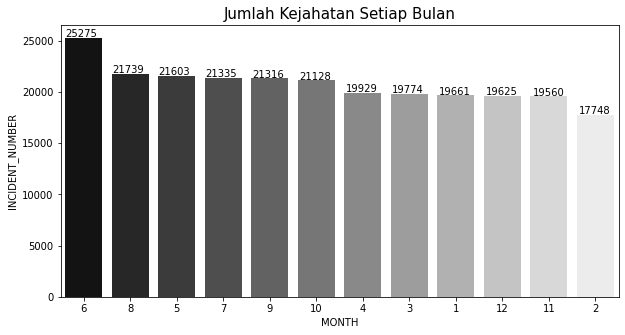

In [21]:
# Jumlah Kejahatan setiap bulan
plt.figure(figsize=(10, 5))

plt.title("Jumlah Kejahatan Setiap Bulan", fontsize = 15)
plot = sns.barplot(
    data = total_per_month, 
    x = "MONTH",
    y = "INCIDENT_NUMBER",
    order = total_per_month["MONTH"],
    palette = "gray"
)

for p in plot.patches:
    plot.annotate(int(p.get_height()), (p.get_x()*1.005, p.get_height() * 1.005))

plt.show()

In [22]:
# Jumlah kejahatan per hari
total_per_day = df_crime.groupby(by = "DAY_OF_WEEK").count()[["INCIDENT_NUMBER"]].sort_values("INCIDENT_NUMBER", ascending=False)
total_per_day

,INCIDENT_NUMBER
DAY_OF_WEEK,
Friday,37826
Wednesday,36482
Thursday,36167
Tuesday,36114
Monday,35646
Saturday,34870
Sunday,31588


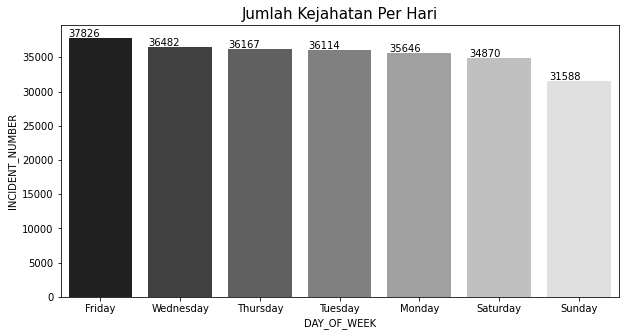

In [23]:
# Jumlah Kejahatan per hari
plt.figure(figsize=(10, 5))

plt.title("Jumlah Kejahatan Per Hari", fontsize = 15)
plot = sns.barplot(
    data = total_per_day, 
    x = total_per_day.index,
    y = "INCIDENT_NUMBER",
    order = total_per_day.index,
    palette = "gray"
)

for p in plot.patches:
    plot.annotate(int(p.get_height()), (p.get_x()*1.005, p.get_height() * 1.005))

plt.show()

In [24]:
# Jumlah Kejahatan berdasarkan jam kejadian

def waktu(x):
    if x in range(0, 7):
        return "Dini Hari"
    elif x in range(7, 13):
        return "Pagi"
    elif x in range(13, 16):
        return "Siang"
    elif x in range(16, 19):
        return "Sore"
    else:
        return "Malam"

data = df_crime[["INCIDENT_NUMBER", "HOUR"]]
data["WAKTU_KEJADIAN"] = data["HOUR"].apply(waktu)
data = data.groupby(by = "WAKTU_KEJADIAN").count()[["INCIDENT_NUMBER"]]
data

,INCIDENT_NUMBER
WAKTU_KEJADIAN,
Dini Hari,36234
Malam,55583
Pagi,70493
Siang,39724
Sore,46659


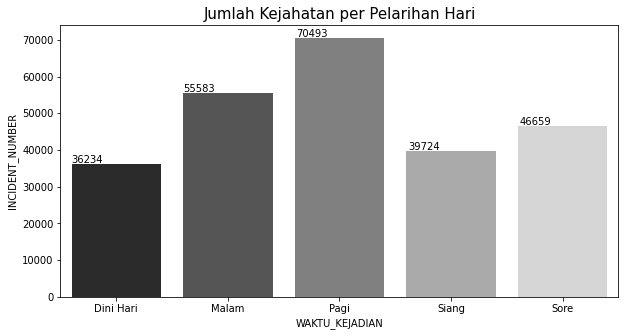

In [25]:
# Jumlah Kejahatan per Pelarihan Hari
plt.figure(figsize=(10, 5))

plt.title("Jumlah Kejahatan per Pelarihan Hari", fontsize = 15)
plot = sns.barplot(
    data = data, 
    x = data.index,
    y = "INCIDENT_NUMBER",
    order = data.index,
    palette = "gray"
)

for p in plot.patches:
    plot.annotate(int(p.get_height()), (p.get_x()*1.005, p.get_height() * 1.005))

plt.show()

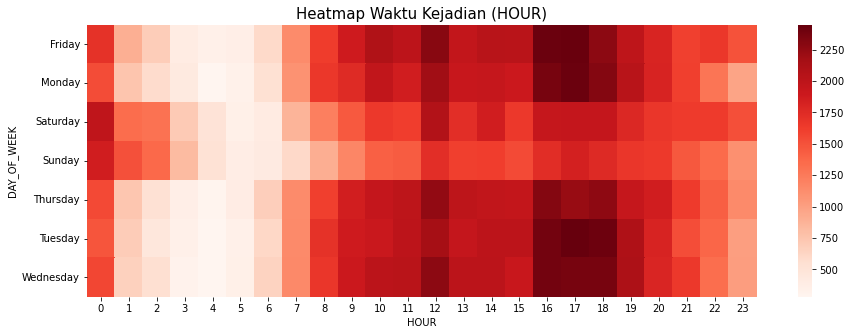

In [26]:
# Visualisasi jam paling sering insiden terjadi
plt.figure(figsize=(15, 5))
plt.title("Heatmap Waktu Kejadian (HOUR)", fontsize = 15)
data = pd.pivot_table(
    data = df_crime, 
    index = "DAY_OF_WEEK", 
    columns = "HOUR", 
    values = "INCIDENT_NUMBER", 
    aggfunc = 'count'
)

sns.heatmap(data, cmap = 'Reds')
plt.show()

Terlihat kejahatan sering terjadi pada sore hari.

> ## Analisis Berdasarkan Tempat Kejadian.

In [27]:
# District tempat insiden sering terjadi.

df_crime["DISTRICT"].value_counts()[:10]

B2     37994
C11    33887
D4     31718
B3     27979
A1     26240
C6     18401
D14    16697
E18    14267
E13    13956
A7     11303
Name: DISTRICT, dtype: int64

In [28]:
# Jalan tempat insiden sering terjadi.

df_crime["STREET"].value_counts()[:10]

WASHINGTON ST        11558
BLUE HILL AVE         5798
BOYLSTON ST           5587
DORCHESTER AVE        4085
TREMONT ST            3816
CENTRE ST             3589
MASSACHUSETTS AVE     3448
COMMONWEALTH AVE      3412
HARRISON AVE          3272
HYDE PARK AVE         2939
Name: STREET, dtype: int64

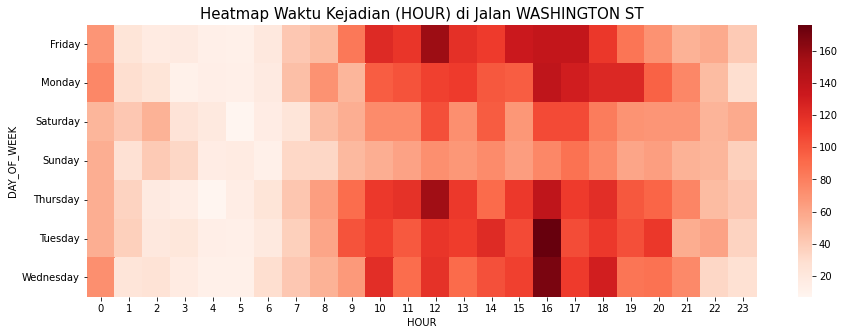

In [29]:
# Pada jam berapa kejahatan di jalan Washington sering terjadi?

plt.figure(figsize=(15, 5))
plt.title("Heatmap Waktu Kejadian (HOUR) di Jalan WASHINGTON ST", fontsize = 15)
data = pd.pivot_table(
    data = df_crime[df_crime["STREET"] == "WASHINGTON ST"], 
    index = "DAY_OF_WEEK", 
    columns = "HOUR", 
    values = "INCIDENT_NUMBER", 
    aggfunc = 'count'
)

sns.heatmap(data, cmap = 'Reds')
plt.show()

In [30]:
our_map = folium.Map(location=[42.361145, -71.057083], zoom_start=13)

# Tambahkan Marker
cluster = MarkerCluster()

# iterasi posisi Latitude dan Longitude pada DataFrame
for idx, row in df_crime.iterrows():  
    cluster.add_child(Marker([row['Lat'], row['Long']]))

our_map.add_child(cluster)

> ## Analisis Berdasarkan Jenis Kejahatan.

In [35]:
# Insiden yang paling sering terjadi

total_per_crime = df_crime["OFFENSE_CODE_GROUP"].value_counts().rename_axis("OFFENSE_CODE_GROUP").reset_index(name= "JUMLAH")
total_per_crime.head(10)

,OFFENSE_CODE_GROUP,JUMLAH
0,Motor Vehicle Accident Response,27454
1,Larceny,22239
2,Medical Assistance,20614
3,Investigate Person,16139
4,Other,12577
5,Vandalism,12551
6,Simple Assault,12046
7,Verbal Disputes,11600
8,Drug Violation,9759
9,Towed,9658


In [36]:
# Fungsi untuk menampilkan grafik treemap

def treemap(categories, title, path, values):
    fig = px.treemap(categories, 
                     path = path, 
                     values = values, 
                     height = 700, 
                     title = title, 
                     color_discrete_sequence = px.colors.sequential.RdBu)
    fig.data[0].textinfo = 'label+text+value'
    fig.show()

treemap(total_per_crime, "Mayoritas Insiden Kota Boston", ["OFFENSE_CODE_GROUP"], total_per_crime["JUMLAH"])

**Jam berapa dan Di jalan mana Kejadian Motor Vehicle Accident Respons paling sering terjadi?**

In [37]:
df = df_crime[df_crime["OFFENSE_CODE_GROUP"] == "Motor Vehicle Accident Response"].groupby(["STREET", "HOUR"]).count()[["OFFENSE_CODE_GROUP"]].sort_values("OFFENSE_CODE_GROUP", ascending=False)
df.head(10)

OFFENSE_CODE_GROUP
STREET        HOUR                    
WASHINGTON ST 16                    80
              15                    66
BLUE HILL AVE 17                    64
WASHINGTON ST 18                    63
              10                    61
              13                    60
              17                    59
BLUE HILL AVE 14                    56
              18                    56
              16                    54

**Pada jam berapa dan dimana Larceny paling sering terjadi?**

In [38]:
df = df_crime[df_crime["OFFENSE_CODE_GROUP"] == "Larceny"].groupby(["STREET", "HOUR"]).count()[["OFFENSE_CODE_GROUP"]].sort_values("OFFENSE_CODE_GROUP", ascending=False)
df.head(10)

OFFENSE_CODE_GROUP
STREET        HOUR                    
BOYLSTON ST   17                   202
              16                   197
              14                   184
              15                   182
              18                   176
WASHINGTON ST 12                   168
BOYLSTON ST   13                   157
WASHINGTON ST 15                   144
BOYLSTON ST   19                   142
              12                   140

> # Kesimpulan dan Rekomendasi.

- Bulan Agustus adalah bulan yang paling sering terjadi suatu insiden atau kejahatan. Hari jumat adalah hari yang paling sering tejadi suatu insiden atau kejahatan. Dan waktu pagi (pukul 6 - 12 am) adalah waktu yang paling sering terjadi kejahatan. Dari data ini kita bisa tahu kapan harus lebih berwaspada lagi.
- Kejahatan yang paling sering terjadi adalah karena kendaraan bermotor (Motor Vehicle Accident Respons). Dan yang paling sering kedua adalah Larceny (Pencurian).
  - Kejadian Motor Vehicle Accident Respons sederhananya adalah kecelakaan kendaraan bermotor. Data ini merupakan yang paling banyak, berarti lebih membutuhkan perhatian khusus. Solusinya bisa dengan memperbaiki lagi regulasi pengawasan di jalan raya ketika berkendara. Harus lebih berhati-hati ketika dijalan BLUE HILLAVE dan WASHINGTON pada waktu siang hari (zuhur sampai maghrib) karena merupakan tempat dan waktu insiden tersebut terjadi.
  - Larceny (Pencurian) adalah kasus kedua yang paling sering terjadi. Sebagai warga, kita bisa lebih berhati-hati dalam menyimpan dan membawa barang berharga, dan sebagai penegak hukum harus lebih sering berpatroli atau cara pencegahan yang lain terutama pada jam siang dan sore di jalan BOYLSTON dan WASHINGTON karena merupakan waktu dan tempat sering terjadi pencurian.
- District tempat paling sering terjadi kejahatan adalah B2, C11, D4 dst..., yang berarti insiden kejadian sering terjadi dipusat kota.